In [18]:
import itertools
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

from soma.util.plot import plot_errors

warnings.simplefilter("ignore")

plt.style.use('seaborn')
plt.style.use('seaborn-notebook')

from soma.util.errors import stat_errors_vs_sample_size
from soma.generators.eye import EyeGenerator
from soma.tests.som import som_test
from soma.tests.knn import knn_test
from soma.tests.c2st import c2s_nn_test, c2s_knn_test

In [2]:
plot_dir = os.path.expanduser('~/Plots/eye')
os.makedirs(plot_dir, exist_ok=True)

In [3]:
tests = {
    'knn': knn_test,
    'som': som_test,
    'c2st_knn': c2s_knn_test,
    'c2st_nn': c2s_nn_test,
}

In [4]:
counts_per_label = EyeGenerator.count_per_label()
counts_per_label

{'R': 4262, 'I': 3804, 'C': 2870}

In [5]:
generators = dict(
    C=EyeGenerator('C'),
    I=EyeGenerator('I'),
    R=EyeGenerator('R'),
)

Comparing with

*A Fast and Effective Large-Scale Two-Sample Test Based on Kernels*

# p-values
As table 6, 0 is better (rejects they are equal)

In [6]:
pairwise = list(itertools.combinations(generators.keys(), 2))

In [7]:
results = DataFrame(columns=tests.keys(), index=[f'{a} vs {b}' for a, b in pairwise])
for a, b in pairwise:
    sample_size = min(counts_per_label[a], counts_per_label[b])
    for test_name, test in tests.items():
        results.loc[f'{a} vs {b}'][test_name] = test(generators[a].sample(sample_size), generators[b].sample(sample_size))
results

,knn,som,c2st_knn,c2st_nn
C vs I,0.0,0.0,0.0,0.0
C vs R,0.0,0.0,0.0,0.0
I vs R,0.0,0.0,0.0,0.0


# Power of the test
As table 8, higher is better

In [8]:
sample_sizes = np.array([100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 10000])
significance = 0.001
repeat = int(3 * (1 / significance))
repeat

50

## I vs C

In [9]:
ic_results = stat_errors_vs_sample_size(generators['I'], generators['C'], tests, sample_sizes, alpha=significance, repeat=repeat)

  0%|          | 0/16 [00:00<?, ?it/s]

In [26]:
ic_results.to_csv(os.path.join(plot_dir, 'ic_results.csv'))
ic_results

error1 error2      time
test     samples                        
knn      100       0.02   0.02  0.003312
         200        0.0    0.0  0.007125
         300        0.0    0.0   0.01199
         400       0.02    0.0  0.011719
som      100        0.0   0.98  0.017206
         200        0.0   0.04   0.05947
         300        0.0    0.0  0.103717
         400        0.0    0.0  0.064442
c2st_knn 100        0.0    0.8  0.002373
         200        0.0   0.52  0.004217
         300        0.0   0.24  0.006842
         400        0.0   0.06  0.007164
c2st_nn  100        0.0   0.96  0.324668
         200        0.0    0.7  0.535577
         300        0.0   0.36  0.432385
         400        0.0   0.12  0.535375

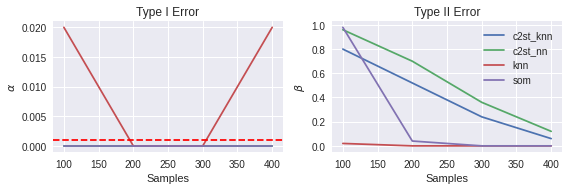

In [24]:
ic_results_fig = plot_errors(ic_results, alpha=significance)
ic_results_fig.savefig(os.path.join(plot_dir, 'ic_results.eps'))

## I vs R

In [11]:
ir_results = stat_errors_vs_sample_size(generators['I'], generators['R'], tests, sample_sizes, alpha=significance, repeat=repeat)

  0%|          | 0/16 [00:00<?, ?it/s]

In [12]:
ir_results.to_csv(os.path.join(plot_dir, 'ir_results.csv'))
ir_results

error1 error2      time
test     samples                        
knn      100       0.02   0.96  0.003208
         200       0.04   0.98  0.005878
         300        0.0    0.9  0.009057
         400        0.0   0.72  0.012835
som      100        0.0    1.0  0.009562
         200        0.0    1.0  0.013383
         300        0.0    1.0  0.066641
         400        0.0   0.96  0.031661
c2st_knn 100        0.0    1.0  0.002233
         200        0.0    1.0  0.003653
         300        0.0    1.0  0.005733
         400        0.0    1.0  0.008753
c2st_nn  100        0.0    1.0  0.224909
         200        0.0    1.0  0.413575
         300        0.0    1.0  0.543354
         400        0.0    1.0  0.534998

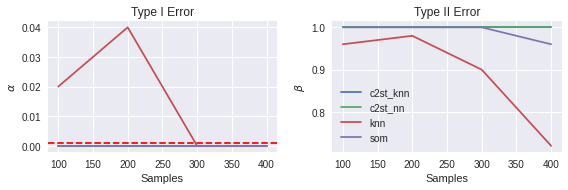

In [23]:
ir_results_fig = plot_errors(ir_results, alpha=significance)
ir_results_fig.savefig(os.path.join(plot_dir, 'ir_results.eps'))

## R vs C

In [13]:
rc_results = stat_errors_vs_sample_size(generators['R'], generators['C'], tests, sample_sizes, alpha=significance, repeat=repeat)

  0%|          | 0/16 [00:00<?, ?it/s]

In [25]:
rc_results.to_csv(os.path.join(plot_dir, 'rc_results.csv'))
rc_results

error1 error2      time
test     samples                        
knn      100       0.04   0.04  0.003735
         200        0.0    0.0  0.006414
         300       0.02    0.0  0.009467
         400        0.0    0.0  0.012953
som      100        0.0    1.0  0.046919
         200        0.0   0.24  0.032549
         300        0.0    0.0  0.085683
         400        0.0    0.0  0.071042
c2st_knn 100        0.0    0.9  0.002192
         200        0.0    0.8  0.003561
         300        0.0   0.44  0.006221
         400        0.0   0.12  0.007013
c2st_nn  100        0.0   0.96  0.213594
         200        0.0   0.84    0.3995
         300        0.0    0.7   0.41163
         400        0.0   0.36   0.54084

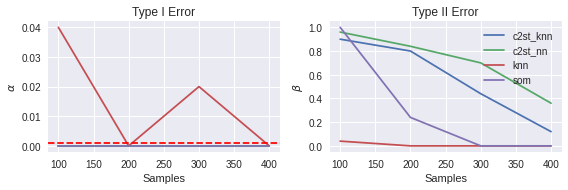

In [22]:
rc_results_fig = plot_errors(rc_results, alpha=significance)
rc_results_fig.savefig(os.path.join(plot_dir, 'rc_results.eps'))

## I vs I

Obviously this must report a low power, since it should **not** be able to reject $H_0$ (both distributions are the same!).
This is a cross-check to verify the code is working as intended.

In [15]:
ii_results = stat_errors_vs_sample_size(generators['I'], generators['I'], tests, sample_sizes, alpha=significance, repeat=10)

  0%|          | 0/16 [00:00<?, ?it/s]

In [16]:
ii_results

error1 error2      time
test     samples                        
knn      100        0.0    1.0  0.003222
         200        0.0    1.0   0.00796
         300        0.1    1.0  0.011007
         400        0.1    1.0  0.014138
som      100        0.0    1.0  0.011379
         200        0.0    1.0  0.175305
         300        0.0    1.0  0.218127
         400        0.0    1.0  0.197097
c2st_knn 100        0.0    1.0  0.002571
         200        0.0    1.0  0.004475
         300        0.0    1.0  0.005797
         400        0.0    1.0  0.008938
c2st_nn  100        0.0    1.0  0.246332
         200        0.0    1.0  0.256772
         300        0.0    1.0  0.325034
         400        0.0    1.0  0.479082